In [2]:
%run packages.py

2025-01-04 18:59:13.782626: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from data_import_enginnering import DataImportEnginnering
from metric_selection import Pair_Selection
from data_visualization import Data_Visualization
import importlib

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# 1. Importation of data into a dictionary

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
Stock_list = pd.DataFrame(tables[0])
Stock_list.drop(['Security','GICS Sub-Industry','Headquarters Location','CIK','Founded'],axis = 1, inplace=True)
Stock_list['Date added'] = pd.to_datetime(Stock_list['Date added'])
Stock_list = Stock_list[( Stock_list['Date added'] < '2019-12-31') & (Stock_list['Date added']>'2015-01-01')][['Symbol','GICS Sector']]

In [7]:
stock_list = list(Stock_list['Symbol'].unique())
Stock_list_sector = Stock_list.groupby('GICS Sector')['Symbol'].unique().to_dict()
sector_list = list(Stock_list_sector.keys())
pairs = {k:[tuple(sorted((i,j))) for i in Stock_list_sector[k] for j in Stock_list_sector[k] if j!=i] for k in sector_list}
pairs = {k :sorted(list(set(pairs[k]))) for k in sector_list}

In [8]:
start_date = '2018-01-01'
end_date = '2019-12-31'
period = '1d'
colone = ['Close']


In [9]:
Enginner = DataImportEnginnering(stock_list,start_date=start_date,end_date=end_date,period=period,colone=colone)

In [10]:
raw_data = Enginner.RawData()
raw_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'AOS': Price           Close
 Ticker            AOS
 Date                 
 2018-01-02  54.426796
 2018-01-03  54.754086
 2018-01-04  55.010601
 2018-01-05  55.718254
 2018-01-08  55.983616
 ...               ...
 2019-12-23  43.067322
 2019-12-24  43.396225
 2019-12-26  43.615486
 2019-12-27  43.679440
 2019-12-30  43.460171
 
 [502 rows x 1 columns],
 'AMD': Price           Close
 Ticker            AMD
 Date                 
 2018-01-02  10.980000
 2018-01-03  11.550000
 2018-01-04  12.120000
 2018-01-05  11.880000
 2018-01-08  12.280000
 ...               ...
 2019-12-23  45.459999
 2019-12-24  46.540001
 2019-12-26  46.630001
 2019-12-27  46.180000
 2019-12-30  45.520000
 
 [502 rows x 1 columns],
 'ALB': Price            Close
 Ticker             ALB
 Date                  
 2018-01-02  120.240562
 2018-01-03  120.478249
 2018-01-04  119.043022
 2018-01-05  120.414268
 2018-01-08  125.652420
 ...                ...
 2019-12-23   68.524284
 2019-12-24   68.420219
 2019-12-26   68.

# 2. Normalisation of data

In [11]:
raw_data_normalized = {}
for key, value in raw_data.items():
    raw_data_normalized[key] = Enginner.normalize(value)

/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/data_import_enginnering.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data_normalized.fillna(method = 'ffill',inplace = True)
/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/data_import_enginnering.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data_normalized.fillna(method = 'ffill',inplace = True)
/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/data_import_enginnering.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data_normalized.fillna(method = 'ffill',inplace = True)
/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/data_import_enginnering.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated

In [12]:
dataframe_normalized = Enginner.Dictionnary_to_Dataframe(raw_data_normalized)
raw_dataframe = Enginner.Dictionnary_to_Dataframe(raw_data)

In [13]:
dataframe_normalized= dataframe_normalized.stack().stack().droplevel(level =2).unstack()
raw_dataframe= raw_dataframe.stack().stack().droplevel(level =2).unstack()

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_1108/628406389.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  dataframe_normalized= dataframe_normalized.stack().stack().droplevel(level =2).unstack()
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_1108/628406389.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  raw_dataframe= raw_dataframe.stack().stack().droplevel(level =2).unstack()


In [14]:
#raw_data = first dictionnary with non normalised data for each ticker
#raw_data_normalized = dictionnary with normalised data
#raw_dataframe = raw_data into dataframe
#dataframe_normalized = raw_data_normalized into dataframe

# 3. Selection of pairs (2) and new dictionary for them

In [15]:
Metric = Pair_Selection(dataframe_normalized,number_of_pair=2,stock_list_sector=Stock_list_sector,sector_list=sector_list)

In [16]:
distance = Metric.compute_euclidian_distance()

In [17]:
selected_pairs = Metric.paire_selection(distance,number_of_pair=2,stock_list_sector=Stock_list_sector,sector_list=sector_list,pairs=pairs)

In [18]:
selected_pairs

{'Communication Services': [('FOX', 'FOXA'), ('LYV', 'TMUS')],
 'Consumer Discretionary': [('HLT', 'NVR'), ('LKQ', 'MGM')],
 'Consumer Staples': [('CHD', 'LW'), ('KHC', 'LW')],
 'Energy': [('BKR', 'FANG')],
 'Financials': [('CPAY', 'GPN'), ('GPN', 'MSCI')],
 'Health Care': [('COO', 'IQV'), ('IQV', 'STE')],
 'Industrials': [('CPRT', 'LDOS'), ('CPRT', 'TDG')],
 'Information Technology': [('ANSS', 'CDW'), ('CDNS', 'SNPS')],
 'Materials': [('ALB', 'DD'), ('DOW', 'PKG')],
 'Real Estate': [('FRT', 'REG'), ('O', 'UDR')],
 'Utilities': [('AWK', 'LNT'), ('AWK', 'SRE')]}

In [19]:
data1 = dataframe_normalized.copy()
data2 = raw_dataframe.copy()
# The goal would be to stock every small data frame in a dictionnay to help doing the steps for the reste 
dataframes_dictionnary_norm = {}
dataframes_dictionnary_raw ={}
for sector in sector_list: 
    for value in selected_pairs[sector]:
        
        dataframes_dictionnary_norm[value] = data1[list(value)]
        dataframes_dictionnary_raw[value] = data2[list(value)]

In [20]:
#dataframes_dictionnary_norm = dictionnary containing normalized data for each of the selected pairs
#dataframes_dictionnary_raw = dictionnary containing raw data for each of the selected pairs

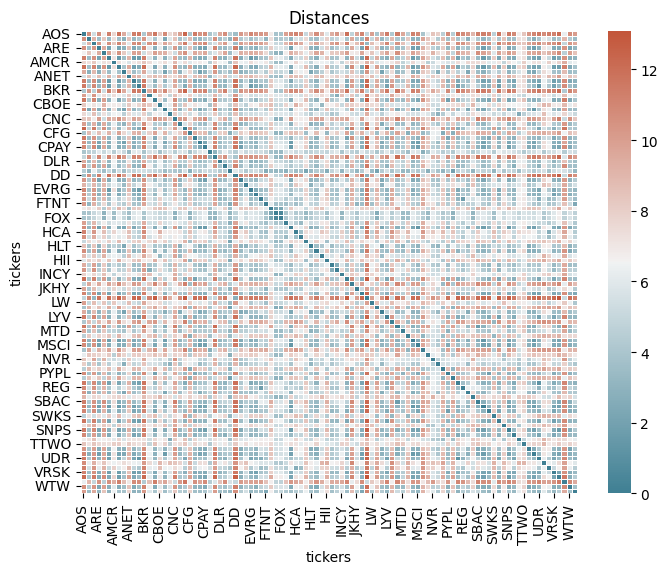

In [21]:
plots = Data_Visualization()
plots.metric(distance, "Distances","tickers","tickers")

<Figure size 1500x2000 with 0 Axes>

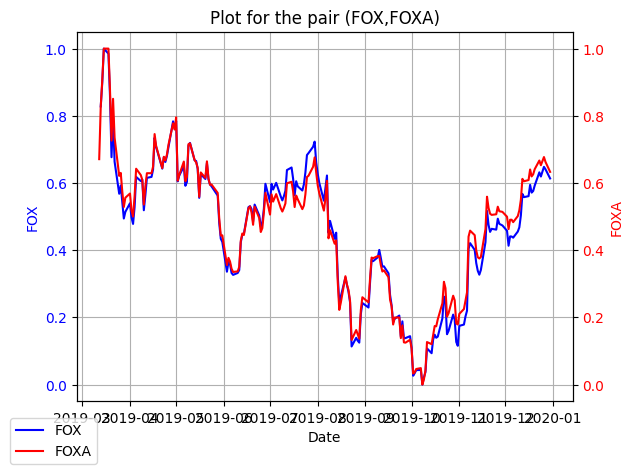

In [31]:
plots.pair_historic(dataframes_dictionnary_norm,('FOX','FOXA'))

# 4. Computation of spreads

In [23]:
from Spread import Spread


In [24]:
for key,values in dataframes_dictionnary_norm.items():
    values['Delta'] = np.abs(values[key[0]] - values[key[1]])
    values['Delta_norm'] = (values['Delta'] - values['Delta'].rolling(10).mean()) / values['Delta'].rolling(10).std()
    values.drop(['Delta'], axis = 1, inplace=True )

dataframes_dictionnary_norm


/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_1108/1693056066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta'] = np.abs(values[key[0]] - values[key[1]])
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_1108/1693056066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta_norm'] = (values['Delta'] - values['Delta'].rolling(10).mean()) / values['Delta'].rolling(10).std()
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_1108/1693056066.py:4: Setti

{('FOX',
  'FOXA'): Ticker           FOX      FOXA  Delta_norm
 Date                                      
 2018-01-02       NaN       NaN         NaN
 2018-01-03       NaN       NaN         NaN
 2018-01-04       NaN       NaN         NaN
 2018-01-05       NaN       NaN         NaN
 2018-01-08       NaN       NaN         NaN
 ...              ...       ...         ...
 2019-12-23  0.631740  0.666870   -2.611081
 2019-12-24  0.619287  0.652901   -1.969595
 2019-12-26  0.648025  0.677234   -1.859154
 2019-12-27  0.640840  0.662815   -1.892672
 2019-12-30  0.613539  0.633076   -1.585929
 
 [502 rows x 3 columns],
 ('LYV',
  'TMUS'): Ticker           LYV      TMUS  Delta_norm
 Date                                      
 2018-01-02  0.163553  0.295082         NaN
 2018-01-03  0.159762  0.280084         NaN
 2018-01-04  0.153263  0.258807         NaN
 2018-01-05  0.181695  0.314615         NaN
 2018-01-08  0.174384  0.332054         NaN
 ...              ...       ...         ...
 2019-12-23

In [25]:
compute_spread = Spread(dataframes_dictionnary_norm)
Dollar_neutral = compute_spread.dollar_neutral_spread()
Dollar_neutral

/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/Spread.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta'] = np.abs(values[key[0]]/values[key[1]])
/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/Spread.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta_norm'] = (values['Delta'] - values['Delta'].rolling(10).mean()) / values['Delta'].rolling(10).std()
/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/Spread.py:16: SettingWithCopyWarning: 
A value is trying 

{('FOX',
  'FOXA'): Ticker           FOX      FOXA  Delta_norm
 Date                                      
 2018-01-02       NaN       NaN         NaN
 2018-01-03       NaN       NaN         NaN
 2018-01-04       NaN       NaN         NaN
 2018-01-05       NaN       NaN         NaN
 2018-01-08       NaN       NaN         NaN
 ...              ...       ...         ...
 2019-12-23  0.631740  0.666870    2.160839
 2019-12-24  0.619287  0.652901    1.850279
 2019-12-26  0.648025  0.677234    1.841208
 2019-12-27  0.640840  0.662815    1.788556
 2019-12-30  0.613539  0.633076    1.470382
 
 [502 rows x 3 columns],
 ('LYV',
  'TMUS'): Ticker           LYV      TMUS  Delta_norm
 Date                                      
 2018-01-02  0.163553  0.295082         NaN
 2018-01-03  0.159762  0.280084         NaN
 2018-01-04  0.153263  0.258807         NaN
 2018-01-05  0.181695  0.314615         NaN
 2018-01-08  0.174384  0.332054         NaN
 ...              ...       ...         ...
 2019-12-23

In [26]:
beta_neutral = compute_spread.beta_neutral_spread()
beta_neutral

/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/Spread.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta'] = np.abs(values[key[0]] - values[key[1]]*beta)
/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/Spread.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta_norm'] = (values['Delta'] - values['Delta'].rolling(10).mean()) / values['Delta'].rolling(10).std()
/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/Spread.py:38: SettingWithCopyWarning: 
A value is 

{('FOX',
  'FOXA'): Ticker           FOX      FOXA  Delta_norm
 Date                                      
 2018-01-02       NaN       NaN         NaN
 2018-01-03       NaN       NaN         NaN
 2018-01-04       NaN       NaN         NaN
 2018-01-05       NaN       NaN         NaN
 2018-01-08       NaN       NaN         NaN
 ...              ...       ...         ...
 2019-12-23  0.631740  0.666870         NaN
 2019-12-24  0.619287  0.652901         NaN
 2019-12-26  0.648025  0.677234         NaN
 2019-12-27  0.640840  0.662815         NaN
 2019-12-30  0.613539  0.633076         NaN
 
 [502 rows x 3 columns],
 ('LYV',
  'TMUS'): Ticker           LYV      TMUS  Delta_norm
 Date                                      
 2018-01-02  0.163553  0.295082         NaN
 2018-01-03  0.159762  0.280084         NaN
 2018-01-04  0.153263  0.258807         NaN
 2018-01-05  0.181695  0.314615         NaN
 2018-01-08  0.174384  0.332054         NaN
 ...              ...       ...         ...
 2019-12-23

In [27]:
compute_spread2 = Spread(dataframes_dictionnary_raw)
dollar_neutral = compute_spread2.dollar_neutral_spread2()
dollar_neutral

/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/Spread.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta'] = np.abs(values[key[0]] - values[key[1]]*dollar_coef)
/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/Spread.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta_norm'] = (values['Delta'] - values['Delta'].rolling(10).mean()) / values['Delta'].rolling(10).std()
/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/Spread.py:58: SettingWithCopyWarning: 
A va

{('FOX',
  'FOXA'): Ticker            FOX       FOXA  Delta_norm
 Date                                        
 2018-01-02        NaN        NaN         NaN
 2018-01-03        NaN        NaN         NaN
 2018-01-04        NaN        NaN         NaN
 2018-01-05        NaN        NaN         NaN
 2018-01-08        NaN        NaN         NaN
 ...               ...        ...         ...
 2019-12-23  33.958374  34.885117         NaN
 2019-12-24  33.837852  34.740746         NaN
 2019-12-26  34.115982  34.992229         NaN
 2019-12-27  34.046444  34.843208         NaN
 2019-12-30  33.782223  34.535847         NaN
 
 [502 rows x 3 columns],
 ('LYV',
  'TMUS'): Ticker            LYV       TMUS  Delta_norm
 Date                                        
 2018-01-02  42.650002  63.061268         NaN
 2018-01-03  42.509998  62.637844         NaN
 2018-01-04  42.270000  62.037167         NaN
 2018-01-05  43.320000  63.612713         NaN
 2018-01-08  43.049999  64.105072         NaN
 ...           